In [1]:
# This might take 10seconds - loading the model 
from query_layer.queries import (
    search_papers_by_topic, 
    find_topic_experts, 
    search_topics,
    find_experts_with_scores
)
import pandas as pd

/Users/ee/Desktop/research-intelligence-system/venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Finding papers

Using cosine similarity over all-MiniLM-L6-v2 embeddings. You can experiment with different topics.

In [2]:
# Cosine similarity to find relevant topics
search_topics("adhd")

[('Attention Deficit Hyperactivity Disorder', 0.7443872690200806),
 ('Obsessive-Compulsive Spectrum Disorders', 0.4906078279018402),
 ('Neurological and metabolic disorders', 0.47156354784965515),
 ('Eating Disorders and Behaviors', 0.4687325358390808),
 ('Genetics and Neurodevelopmental Disorders', 0.4618586003780365),
 ('Tryptophan and brain disorders', 0.4487806558609009),
 ('Adrenal Hormones and Disorders', 0.4479502737522125),
 ('Hereditary Neurological Disorders', 0.4325449466705322),
 ('Psychosomatic Disorders and Their Treatments', 0.4270617961883545),
 ('Voice and Speech Disorders', 0.4158307909965515)]

In [3]:
# Using similarity > 0.6 
results = search_papers_by_topic("obesity treatment", limit=10)
df = pd.DataFrame(results)
df

,doi,title,published_date,category,topics,citations
0,10.1101/2024.01.18.24301500,Monitoring Report: GLP-1 RA Prescribing Trends...,2024-10-11,primary care research,Diabetes Treatment and Management; Pharmacolog...,11
1,10.1101/2023.11.21.23298775,Comparative Effectiveness of Semaglutide and T...,2023-11-22,primary care research,Diabetes Treatment and Management; Pharmacolog...,10
2,10.1101/2023.10.05.23296619,Population health and health sector cost impac...,2023-10-07,public and global health,"Obesity, Physical Activity, Diet; Obesity and ...",7
3,10.1101/2023.04.20.23288698,Role of the exercise professional in metabolic...,2023-08-18,sports medicine,Bariatric Surgery and Outcomes; Obesity and He...,6
4,10.1101/2023.09.07.23295059,Morning exercise and pre-breakfast metformin i...,2023-09-07,endocrinology,Pharmacology and Obesity Treatment; Dietary Ef...,5
5,10.1101/2024.10.11.617804,Immersion in nature attenuates the development...,2024-10-12,neuroscience,Pain Management and Placebo Effect; Pain Mecha...,5
6,10.1101/2024.10.28.24316312,Racial and Ethnic Disparities in Prescribing o...,2024-11-01,endocrinology,Diabetes Treatment and Management; Diabetes Ma...,4
7,10.1101/2023.10.09.23296744,Integration of a fasting-mimicking diet progra...,2023-10-10,endocrinology,Dietary Effects on Health; Diet and metabolism...,4
8,10.1101/2023.10.20.23297314,Pharmacological Management of Gambling Disorde...,2024-03-20,addiction medicine,Gambling Behavior and Treatments; Schizophreni...,4
9,10.1101/2024.12.12.628169,A Brain Reward Circuit Inhibited By Next-Gener...,2025-06-14,neuroscience,Pharmacology and Obesity Treatment; Diabetes T...,4


In [4]:
results = search_papers_by_topic("treating smoking addiction", limit=10)
df = pd.DataFrame(results)
df

,doi,title,published_date,category,topics,citations
0,10.1101/2023.05.19.23290249,The impact of flavored e-cigarette bans on e-c...,2023-05-21,public and global health,"Smoking Behavior and Cessation; Obesity, Physi...",11
1,10.1101/2023.10.23.23297396,Who would be affected by a ban on disposable v...,2023-10-23,health policy,Smoking Behavior and Cessation; Homelessness a...,7
2,10.1101/2023.11.21.23298778,An electronic cigarette pod system delivering ...,2023-11-22,public and global health,Smoking Behavior and Cessation,7
3,10.1101/2022.11.14.22282288,A decision aid for policymakers to estimate th...,2023-03-21,health policy,"Smoking Behavior and Cessation; Obesity, Physi...",5
4,10.1101/2022.11.17.516984,Adult consequences of repeated nicotine vapor ...,2023-08-26,pharmacology and toxicology,Nicotinic Acetylcholine Receptors Study; Smoki...,5
5,10.1101/2024.08.14.24311761,E-cigarette market share by nicotine claims,2024-08-17,health economics,Smoking Behavior and Cessation; Behavioral Hea...,4
6,10.1101/2023.02.17.23286103,Communicating the benefits of quitting smoking...,2023-02-21,public and global health,Smoking Behavior and Cessation; Behavioral Hea...,4
7,10.1101/2023.05.15.540890,Synthetic Cooling Agent and Candy Flavors in C...,2023-05-18,pharmacology and toxicology,Ion Channels and Receptors; Smoking Behavior a...,3
8,10.1101/2024.01.07.24300815,Public Support for Tobacco Endgame Policies: A...,2024-01-09,public and global health,Smoking Behavior and Cessation; Behavioral Hea...,3
9,10.1101/2024.01.26.24301835,Implementation of Community Health Worker Supp...,2024-04-17,psychiatry and clinical psychology,Smoking Behavior and Cessation; Health and Wel...,3


## Expert Scoring Methodology

### 1. Paper Count (Weight: 0.25)
- **Raw**: Total number of papers published on the topic
- **Normalized**: `paper_count / max_papers_in_results`
- Measures productivity and depth of contribution

### 2. Citation Impact (Weight: 0.35)
- **Raw**: Sum of all citations across topic-related papers
- **Normalized**: `log(1 + citations) / log(1 + max_citations)`
- Uses log scale to handle outliers fairly
- Measures influence and impact of their work

### 3. Recency (Weight: 0.15)
- **Raw**: Most recent paper publication date
- **Normalized**: 
  - `1.0` if published within last 6 months
  - `6 / months_since` for older papers (linear decay)
- Identifies currently active researchers

### 4. Consistency (Weight: 0.15)
- **Raw**: Days between first and last paper on topic
- **Normalized**: `consistency_days / max_consistency_in_results`
- Measures sustained engagement with the research area

### 5. Top Institution (Weight: 0.10)
- **Value**: `1` if affiliated with top-30 ranked institution, else `0`
- No normalization needed
- Accounts for institutional resources and prestige

## Final Score
```
final_score = 0.25×paper_norm + 0.35×citation_norm + 0.15×recency_norm + 0.15×consistency_norm + 0.10×top_institution
```

All scores range from 0 to 1, with higher scores indicating stronger expertise.

In [5]:
results = find_experts_with_scores("obesity treatment", top_n=20)
df = pd.DataFrame(results)
df

,author_name,institution_name,paper_count,paper_norm,total_citations,citation_norm,most_recent_paper,months_since_last_paper,recency_norm,consistency_days,consistency_norm,top_institution,final_score
0,Nicholas L Stucky,Bellevue Hospital Center,3,1.000,15,1.000,2024-07-29,15.7,0.383,339,0.715,False,0.765
1,Samuel Gratzl,Bellevue Hospital Center,3,1.000,15,1.000,2024-07-29,15.7,0.383,339,0.715,False,0.765
2,Brianna M Goodwin Cartwright,Bellevue Hospital Center,3,1.000,15,1.000,2024-07-29,15.7,0.383,339,0.715,False,0.765
3,Patricia J Rodriguez,Bellevue Hospital Center,3,1.000,15,1.000,2024-07-29,15.7,0.383,339,0.715,False,0.765
4,Ty J. Gluckman,Providence College,3,1.000,15,1.000,2024-07-29,15.7,0.383,339,0.715,False,0.765
5,Charlotte Baker,Bellevue Hospital Center,2,0.667,12,0.925,2024-07-29,15.7,0.383,250,0.527,False,0.627
6,Nicholas L Stucky,None,2,0.667,11,0.896,2024-10-11,13.2,0.453,151,0.319,False,0.596
7,Samuel Gratzl,None,2,0.667,11,0.896,2024-10-11,13.2,0.453,151,0.319,False,0.596
8,Brianna M Goodwin Cartwright,None,2,0.667,11,0.896,2024-10-11,13.2,0.453,151,0.319,False,0.596
9,Patricia J Rodriguez,None,2,0.667,11,0.896,2024-10-11,13.2,0.453,151,0.319,False,0.596


In [6]:
results = find_experts_with_scores("prostate surgery", top_n=10)
df = pd.DataFrame(results)
df

,author_name,institution_name,paper_count,paper_norm,total_citations,citation_norm,most_recent_paper,months_since_last_paper,recency_norm,consistency_days,consistency_norm,top_institution,final_score
0,Eva Corey,University of Washington,10,0.909,17,1.000,2025-08-12,3.2,1.000,900,0.964,True,0.972
1,Peter S. Nelson,Fred Hutch Cancer Center,11,1.000,17,1.000,2025-09-11,2.2,1.000,901,0.965,False,0.895
2,Anders M. Dale,"University of California, San Diego",7,0.636,16,0.980,2025-01-25,9.8,0.615,704,0.754,False,0.707
3,Freddie C. Hamdy,University of Oxford,4,0.364,8,0.760,2025-01-25,9.8,0.615,684,0.732,True,0.659
4,Colm Morrissey,University of Washington,3,0.273,5,0.620,2025-09-11,2.2,1.000,700,0.749,True,0.648
5,Ian G. Mills,University of Oxford,4,0.364,7,0.719,2024-12-06,11.4,0.526,634,0.679,True,0.623
6,Wilbert Zwart,Eindhoven University of Technology,4,0.364,6,0.673,2025-08-12,3.2,1.000,900,0.964,False,0.621
7,Tyler M. Seibert,None,4,0.364,14,0.937,2025-05-18,6.0,0.993,248,0.266,False,0.608
8,Christopher C. Conlin,"University of California, San Diego",5,0.455,12,0.887,2024-11-26,11.7,0.512,644,0.690,False,0.604
9,Joshua Kuperman,"University of California, San Diego",5,0.455,12,0.887,2024-11-26,11.7,0.512,644,0.690,False,0.604


## Linkedin Matching

Needs a Swarm API key (happy to demo live)

In [7]:
from linkedin.swarm import get_linkedin_url
import asyncio

full_name = "Eva Corey"
institution = "University of Washington"

linkedin_url = await get_linkedin_url(full_name, institution)
print(linkedin_url)

https://linkedin.com/in/eva-corey-b7bb6025


In [8]:
full_name = "Wilbert Zwart"
institution = "Eindhoven University of Technology"

linkedin_url = await get_linkedin_url(full_name, institution)
print(linkedin_url)

https://linkedin.com/in/wilbert-zwart-1499986b


In [9]:
results = find_experts_with_scores("crispr", top_n=20)
df = pd.DataFrame(results)
df = df[df['institution_name'].notna()]

async def get_all_linkedin_urls():
    for idx, row in df.iterrows():
        name = row['author_name']
        institution = row['institution_name']
        
        print(f"\n{idx+1}/{len(df)}: {name} at {institution}")
        url = await get_linkedin_url(name, institution)
        
        if url:
            print(f"{url}")
        else:
            print(f"Not found")
        
        if idx < len(df) - 1:
            await asyncio.sleep(0.7)

await get_all_linkedin_urls()


1/20: George M. Church at Harvard University
Error: 429, message='', url='https://bee.theswarm.com/v2/profiles/search'
Not found

2/20: Cameron Myhrvold at Princeton University
https://linkedin.com/in/cameron-myhrvold-948a1a78

3/20: Sidi Chen at Yale University
https://linkedin.com/in/sidi-chen-83779224

4/20: Katherine M. Munson at University of Washington
https://linkedin.com/in/katherinemunson

5/20: Samuel H. Sternberg at Columbia University
https://linkedin.com/in/samuel-sternberg-83560bb7

6/20: Lacramioara Bintu at Stanford University
Not found

7/20: Anshul Kundaje at Stanford University
https://linkedin.com/in/anshulkundaje

8/20: Michael B. Elowitz at California Institute of Technology
Not found

9/20: Anusri Pampari at Stanford University
https://linkedin.com/in/anusri-pampari-594bb5126

10/20: Kate E. Galloway at Massachusetts Institute of Technology
Not found

11/20: Dmitri A. Petrov at Stanford University
https://linkedin.com/in/dmitri-petrov-9858381b0

12/20: Elliott S

##  Citation Tracking

I couldn't obtain real citation data within a week, so I simulated 3 papers with different growth patterns to demonstrate the approach I'd use on real data.

Assuming we have snapshots building up over time, I'd calculate three metrics weekly.

### 1. Velocity (citations/month)

- New citations gained since last snapshot
- Formula: `current_citations - previous_citations`

### 2. Smoothed Velocity (3-month moving average)
- Average velocity over recent months
- Formula: `rolling_mean(velocity, window=3)`

### 3. Growth Rate (%)
- Percentage change from previous snapshot. Shows relative acceleration
- Formula: `(current - previous) / previous * 100`

To flag high traction papers I'd use a heuristic like:
```
IF smoothed_velocity > topic_75th_percentile_velocity AND growth_rate > topic_75th_percentile_growth
THEN flag as "HIGH TRACTION"
```
Since I don't know what a good velocity is for a given topic. +3 citations might be pretty good for a nieche topic, but +10 might not be impressive for an ML paper. 

Paper A (Steady Growth)
  Total: 93
  Velocity: 13/month
  Smoothed: 12.0/month
  Growth: 16.3%

Paper B (Explosive)
  Total: 268
  Velocity: 67/month
  Smoothed: 55.0/month
  Growth: 33.3%

Paper C (Plateauing)
  Total: 37
  Velocity: 0/month
  Smoothed: 0.3/month
  Growth: 0.0%

            citations  velocity  smoothed_velocity  growth_rate
2025-08-01         68      26.0          17.666667    61.904762
2025-09-01        103      35.0          26.000000    51.470588
2025-10-01        147      44.0          35.000000    42.718447
2025-11-01        201      54.0          44.333333    36.734694
2025-12-01        268      67.0          55.000000    33.333333


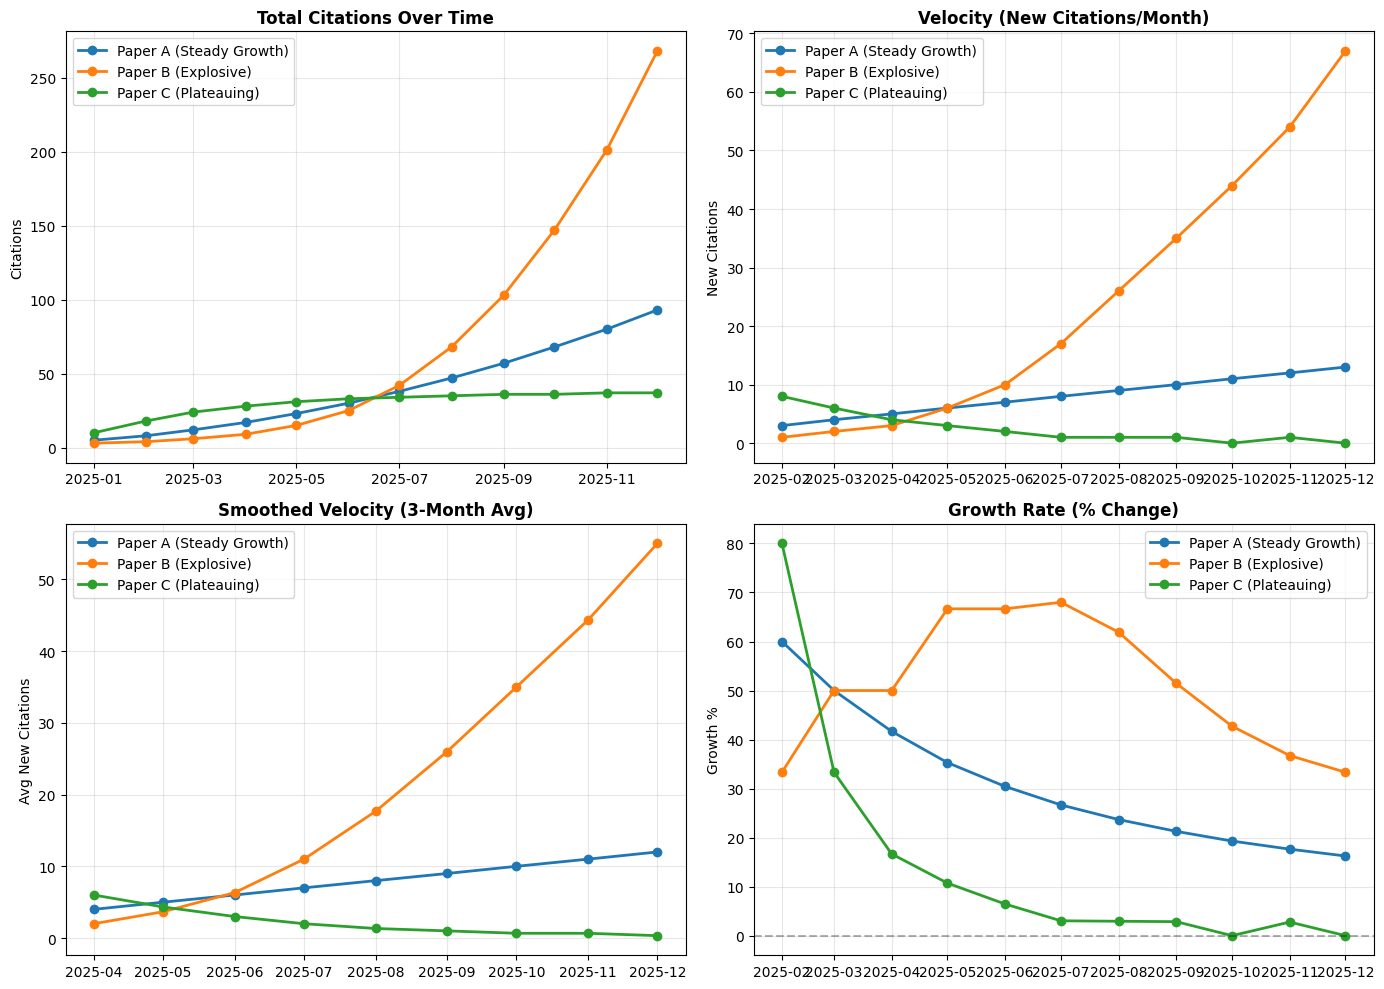

In [12]:
from query_layer.citation_simulation import (
    generate_fake_data,
    calculate_metrics,
    plot_comparison,
    summarize_paper
)

# Generate data
df = generate_fake_data()

# Get metrics for all papers
for paper in df.columns:
    summary = summarize_paper(paper, df[paper])
    print(f"{summary['paper']}")
    print(f"  Total: {summary['total_citations']}")
    print(f"  Velocity: {summary['velocity']:.0f}/month")
    print(f"  Smoothed: {summary['smoothed_velocity']:.1f}/month")
    print(f"  Growth: {summary['growth_rate']:.1f}%")
    print()

# Plot comparison
fig = plot_comparison(df)
fig.savefig('traction_analysis.png', dpi=150, bbox_inches='tight')

# Or analyze a single paper in detail
paper_metrics = calculate_metrics(df['Paper B (Explosive)'])
print(paper_metrics.tail())